In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [7]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [8]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [9]:
print("Shape of the DataFrame:",df.shape)
print(df.sample(5))

Shape of the DataFrame: (18000, 2)
                                                    text    label
2141   i wonder if am i alone in the fact that i am a...  sadness
15749  i was trapped in the mall and was starting to ...    anger
96     im starting to feel wryly amused at the banal ...      joy
12854      i feel more peaceful and together than i have      joy
6862                  i feel even more blank than before  sadness


<Axes: xlabel='label', ylabel='count'>

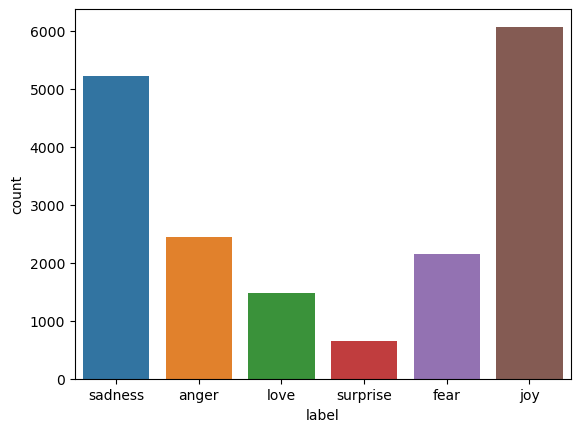

In [10]:
sns.countplot(x=df.label)

In [11]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [12]:
custom_encoder(df['label'])

<Axes: xlabel='label', ylabel='count'>

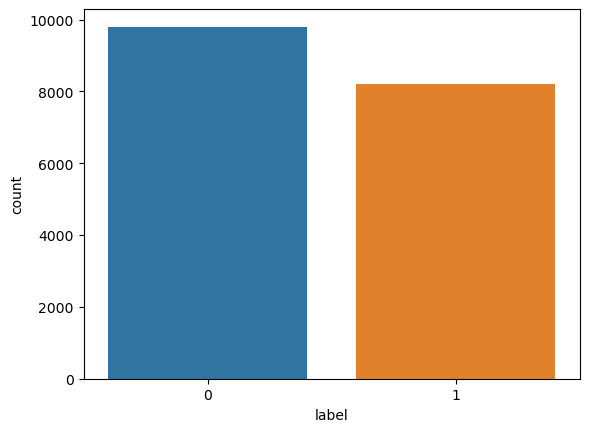

In [13]:
sns.countplot(x=df.label)

In [14]:
lm = WordNetLemmatizer()

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JAHNAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JAHNAV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [18]:
corpus = text_transformation(df['text'])

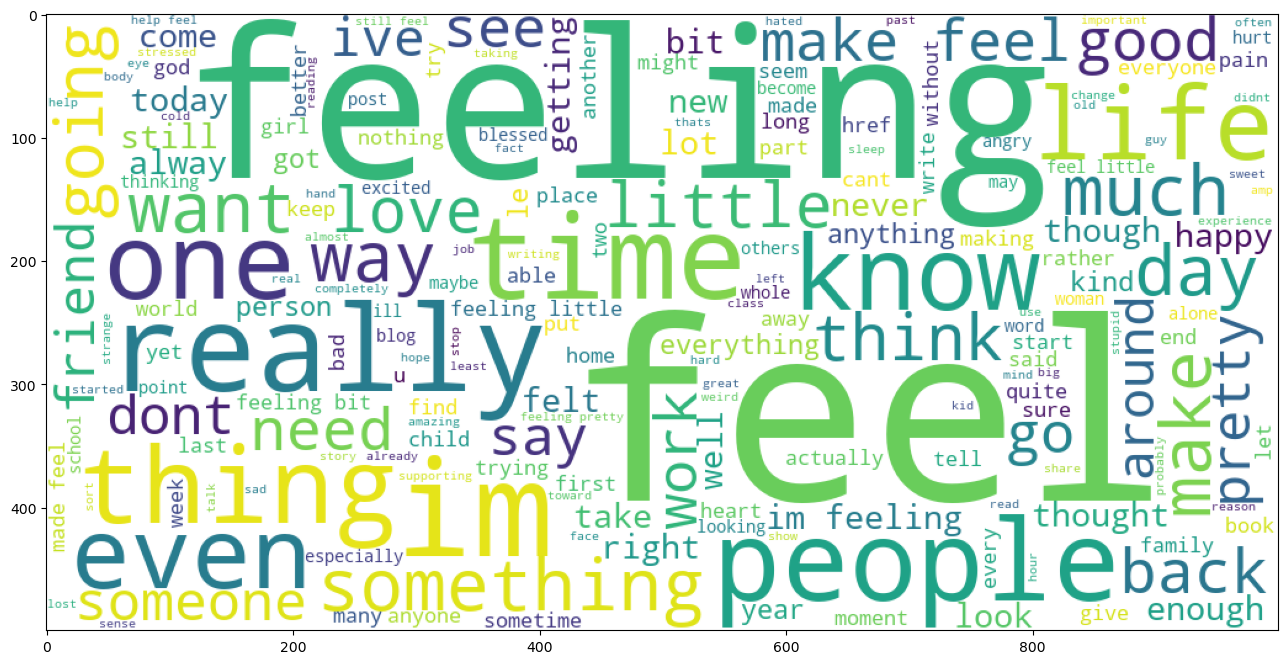

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [20]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [21]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)

In [22]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X, y)
from sklearn.metrics import accuracy_score

y_pred = lg_model.predict(testdata)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9715


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X,y)
y_pred = dt_model.predict(testdata)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy}")
rf_model = RandomForestClassifier()
rf_model.fit(X,y)
y_pred = rf_model.predict(testdata)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.9415
accuracy: 0.963


In [24]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X,y)
y_pred = xg_model.predict(testdata)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.9475


In [25]:
import pickle
import os
# open a file, where you want to store the data
file = open('lg_model.pkl', 'wb')


# dump information to that file
pickle.dump(lg_model, file)


In [26]:
with open("cv.pkl", "wb") as file:
    pickle.dump(cv, file)
